In [1]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [2]:
# Change the path
dataset = pd.read_csv('Credit.csv')

In [3]:
dataset

,Unnamed: 0,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331
...,...,...,...,...,...,...,...,...,...,...,...,...
395,396,12.096,4100,307,3,32,13,Male,No,Yes,Caucasian,560
396,397,13.364,3838,296,5,65,17,Male,No,No,African American,480
397,398,57.872,4171,321,5,67,12,Female,No,Yes,Caucasian,138
398,399,37.728,2525,192,1,44,13,Male,No,Yes,Caucasian,0


In [4]:
dataset.describe()

,Unnamed: 0,Income,Limit,Rating,Cards,Age,Education,Balance
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,45.218885,4735.600000,354.940000,2.957500,55.667500,13.450000,520.015000
std,115.614301,35.244273,2308.198848,154.724143,1.371275,17.249807,3.125207,459.758877
min,1.000000,10.354000,855.000000,93.000000,1.000000,23.000000,5.000000,0.000000
25%,100.750000,21.007250,3088.000000,247.250000,2.000000,41.750000,11.000000,68.750000
50%,200.500000,33.115500,4622.500000,344.000000,3.000000,56.000000,14.000000,459.500000
75%,300.250000,57.470750,5872.750000,437.250000,4.000000,70.000000,16.000000,863.000000
max,400.000000,186.634000,13913.000000,982.000000,9.000000,98.000000,20.000000,1999.000000


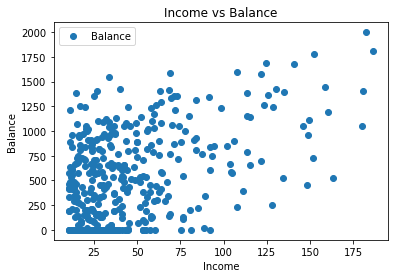

In [5]:
# Input vs Output (Balace vs Income)
dataset.plot(x='Income', y='Balance', style='o')  
plt.title('Income vs Balance')  
plt.xlabel('Income')  
plt.ylabel('Balance')  
plt.show()

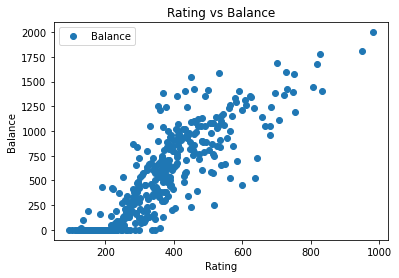

In [6]:
# Input vs Output (Balace vs Income)
dataset.plot(x='Rating', y='Balance', style='o')  
plt.title('Rating vs Balance')  
plt.xlabel('Rating')  
plt.ylabel('Balance')  
plt.show()

C:\Users\WILLCA~1\AppData\Local\Temp/ipykernel_18200/2739100896.py:11: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


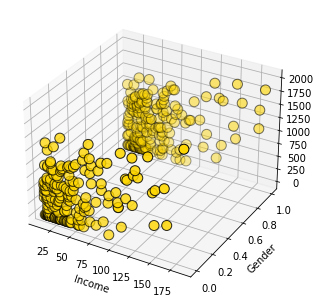

In [7]:
from mpl_toolkits.mplot3d import Axes3D
import random

# Input vs Outpt (Balanace vs Income & Gender)
xs = dataset['Income'].values.reshape(-1,1)
ys = dataset['Gender'].values.reshape(-1,1)=='Female'
zs = dataset['Balance'].values.reshape(-1,1)


fig = plt.figure()
ax = Axes3D(fig)

ax.scatter(xs, ys, zs,s=100, edgecolor="k", facecolor="gold")
plt.xlabel('Income')  
plt.ylabel('Gender') 
plt.show()

Text(0, 0.5, 'Balance')

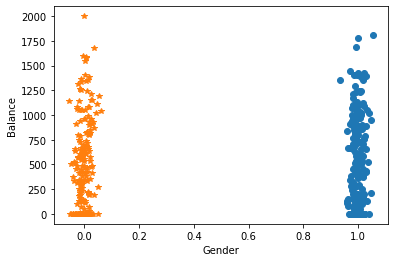

In [8]:
# Balance vs Gender (1 is for female, 0 is for male)
f_xs = []
f_zs = []
g_xs = []
g_zs = []
for x in range(0,len(ys)):
    if ys[x]==True:
        #f_xs.append(xs[x])
        f_xs.append(1+0.02*np.random.normal())
        f_zs.append(zs[x])
    if ys[x]==False:
        #g_xs.append(xs[x])
        g_xs.append(0+0.02*np.random.normal())
        g_zs.append(zs[x])
        
plt.plot(f_xs,f_zs,'o')    
plt.plot(g_xs,g_zs,'*')  
plt.xlabel('Gender')
plt.ylabel('Balance')



Text(0, 0.5, 'Balance')

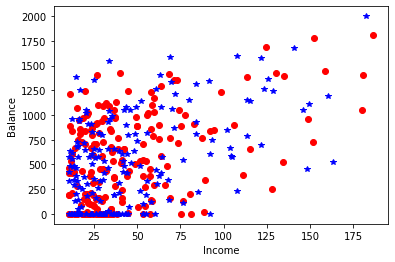

In [9]:
# Balance vs Income conditioned on Gender
f_xs = []
f_zs = []
g_xs = []
g_zs = []
for x in range(0,len(ys)):
    if ys[x]==True:
        f_xs.append(xs[x])
        #f_xs.append(1+0.1*np.random.normal())
        f_zs.append(zs[x])
    if ys[x]==False:
        g_xs.append(xs[x])
        #g_xs.append(0+0.1*np.random.normal())
        g_zs.append(zs[x])
        
plt.plot(f_xs,f_zs,'ro')    
plt.plot(g_xs,g_zs,'b*') 
plt.xlabel('Income')
plt.ylabel('Balance')

In [10]:
# Note that sklearn does not provide summary for the linear regression fit; we use another package here!
# Another solution using statemodels.api
import statsmodels.api as sm
# Input vs Output (Balance as a function of Gender)
X_train = []
temp = dataset['Gender'].values.reshape(-1,1);
for x in range(0,len(temp)):
    if temp[x]=='Female':
        X_train.append(1)
    if temp[x]=='Male':
        X_train.append(0)
y_train = dataset['Balance'].values.reshape(-1,1)

X = sm.add_constant(X_train)
model = sm.OLS(y_train,X).fit()
model.summary()  


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.1836
Date:                Thu, 18 Nov 2021   Prob (F-statistic):              0.669
Time:                        10:53:45   Log-Likelihood:                -3019.3
No. Observations:                 400   AIC:                             6043.
Df Residuals:                     398   BIC:                             6051.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        509.8031     33.128     15.389      0.000     444.675     574.931
x1            19.7331     46.051      0.429      0.669     -70.801     110.267
==============================================================================
Omnibus:                       28.438   Durbin-Watson:                   1.940
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.346
Skew:                           0.583   Prob(JB):                     1.15e-06
Kurtosis:                       2.471   Cond. No.                         2.66
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

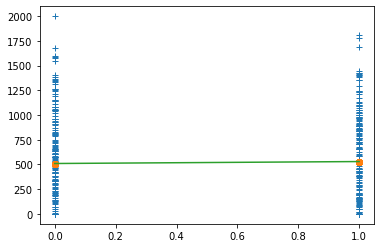

In [11]:
# Plot Prediction vs Observed
# Predict
y_pred = model.predict(X)

# Plot
plt.plot(X_train,y_train,'+')    
plt.plot(X_train,y_pred,'o') 
plt.plot(X_train,y_pred) 

In [12]:
# Note that sklearn does not provide summary for the linear regression fit; we use another package here!
# Another solution using statemodels.api
import statsmodels.api as sm
# Input vs Output (Balance as a function of Gender)
X_train = []
temp = dataset['Gender'].values.reshape(-1,1);
for x in range(0,len(temp)):
    if temp[x]=='Female':
        X_train.append(1)
    if temp[x]=='Male':
        X_train.append(-1)
y_train = dataset['Balance'].values.reshape(-1,1)

X = sm.add_constant(X_train)
model = sm.OLS(y_train,X).fit()
model.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.1836
Date:                Thu, 18 Nov 2021   Prob (F-statistic):              0.669
Time:                        10:53:46   Log-Likelihood:                -3019.3
No. Observations:                 400   AIC:                             6043.
Df Residuals:                     398   BIC:                             6051.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        519.6697     23.026     22.569      0.000     474.403     564.937
x1             9.8666     23.026      0.429      0.669     -35.400      55.134
==============================================================================
Omnibus:                       28.438   Durbin-Watson:                   1.940
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.346
Skew:                           0.583   Prob(JB):                     1.15e-06
Kurtosis:                       2.471   Cond. No.                         1.04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
# Note that sklearn does not provide summary for the linear regression fit; we use another package here!
# Another solution using statemodels.api
import statsmodels.api as sm
# Input vs Output (Balance vs Ethnicity, multiple levels)
X_train = []
temp = dataset['Ethnicity'].values.reshape(-1,1);
for x in range(0,len(temp)):
    if temp[x]=='Asian':
        X_train.append([0, 1])
    elif temp[x]=='Caucasian':
        X_train.append([1, 0])
    else:
        X_train.append([0, 0])

X = sm.add_constant(X_train)

y_train   = dataset['Balance'].values.reshape(-1,1)

model = sm.OLS(y_train,X).fit()
model.summary()  


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.005
Method:                 Least Squares   F-statistic:                   0.04344
Date:                Thu, 18 Nov 2021   Prob (F-statistic):              0.957
Time:                        10:53:46   Log-Likelihood:                -3019.3
No. Observations:                 400   AIC:                             6045.
Df Residuals:                     397   BIC:                             6057.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        531.0000     46.319     11.464      0.000     439.939     622.061
x1           -12.5025     56.681     -0.221      0.826    -123.935      98.930
x2           -18.6863     65.021     -0.287      0.774    -146.515     109.142
==============================================================================
Omnibus:                       28.829   Durbin-Watson:                   1.946
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.395
Skew:                           0.581   Prob(JB):                     1.13e-06
Kurtosis:                       2.460   Cond. No.                         4.39
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
# Balance vs Income plus Student (0/1)
X_train = []
temp = dataset['Student'].values.reshape(-1,1);
temp_e = dataset['Income'].values.reshape(-1,1);
for x in range(0,len(temp)):
    if temp[x]=='No':
        X_train.append([1,np.asscalar(temp_e[x]),0])
    if temp[x]=='Yes':
        X_train.append([1,np.asscalar(temp_e[x]),1])

y_train   = dataset['Balance'].values.reshape(-1,1)

model = sm.OLS(y_train,X_train).fit()
model.summary()  

C:\Users\WILLCA~1\AppData\Local\Temp/ipykernel_18200/2877888418.py:7: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  X_train.append([1,np.asscalar(temp_e[x]),0])
C:\Users\WILLCA~1\AppData\Local\Temp/ipykernel_18200/2877888418.py:9: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  X_train.append([1,np.asscalar(temp_e[x]),1])


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.277
Model:                            OLS   Adj. R-squared:                  0.274
Method:                 Least Squares   F-statistic:                     76.22
Date:                Thu, 18 Nov 2021   Prob (F-statistic):           9.64e-29
Time:                        10:53:46   Log-Likelihood:                -2954.4
No. Observations:                 400   AIC:                             5915.
Df Residuals:                     397   BIC:                             5927.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        211.1430     32.457      6.505      0.000     147.333     274.952
x1             5.9843      0.557     10.751      0.000       4.890       7.079
x2           382.6705     65.311      5.859      0.000     254.272     511.069
==============================================================================
Omnibus:                      119.719   Durbin-Watson:                   1.951
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               23.617
Skew:                           0.252   Prob(JB):                     7.44e-06
Kurtosis:                       1.922   Cond. No.                         192.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0, 0.5, 'fitted')

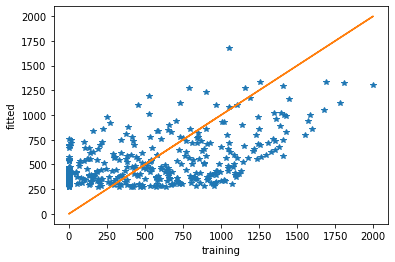

In [15]:
# fitted vs training
y_pred = model.predict(X_train)

plt.plot(y_train,y_pred,'*')
plt.plot(y_train,y_train)
plt.xlabel('training')
plt.ylabel('fitted')

Text(0, 0.5, 'err')

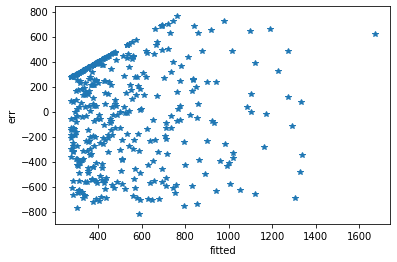

In [16]:
# err vs fitted
err = []
X   = []
for x in range(0,len(y_train)):
        err.append(y_pred[x]-y_train[x])
        X.append(y_pred[x])
        
plt.plot(X,err,'*')
plt.xlabel('fitted')
plt.ylabel('err')

In [17]:
# Interaction Term Studnet*Income
X_train = []
temp = dataset['Student'].values.reshape(-1,1);
temp_e = dataset['Income'].values.reshape(-1,1);
for x in range(0,len(temp)):
    if temp[x]=='No':
        X_train.append([1,np.asscalar(temp_e[x]),0,0])
    if temp[x]=='Yes':
        X_train.append([1,np.asscalar(temp_e[x]),1,np.asscalar(temp_e[x])])

y_train   = dataset['Balance'].values.reshape(-1,1)

model = sm.OLS(y_train,X_train).fit()
model.summary() 

C:\Users\WILLCA~1\AppData\Local\Temp/ipykernel_18200/3989287745.py:7: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  X_train.append([1,np.asscalar(temp_e[x]),0,0])
C:\Users\WILLCA~1\AppData\Local\Temp/ipykernel_18200/3989287745.py:9: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  X_train.append([1,np.asscalar(temp_e[x]),1,np.asscalar(temp_e[x])])


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.280
Model:                            OLS   Adj. R-squared:                  0.274
Method:                 Least Squares   F-statistic:                     51.30
Date:                Thu, 18 Nov 2021   Prob (F-statistic):           4.94e-28
Time:                        10:53:46   Log-Likelihood:                -2953.7
No. Observations:                 400   AIC:                             5915.
Df Residuals:                     396   BIC:                             5931.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        200.6232     33.698      5.953      0.000     134.373     266.873
x1             6.2182      0.592     10.502      0.000       5.054       7.382
x2           476.6758    104.351      4.568      0.000     271.524     681.827
x3            -1.9992      1.731     -1.155      0.249      -5.403       1.404
==============================================================================
Omnibus:                      107.788   Durbin-Watson:                   1.952
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               22.158
Skew:                           0.228   Prob(JB):                     1.54e-05
Kurtosis:                       1.941   Cond. No.                         309.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0, 0.5, 'fitted')

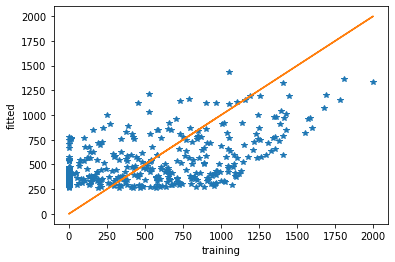

In [18]:
# fitted vs training
y_pred = model.predict(X_train)

plt.plot(y_train,y_pred,'*')
plt.plot(y_train,y_train)
plt.xlabel('training')
plt.ylabel('fitted')

Text(0, 0.5, 'err')

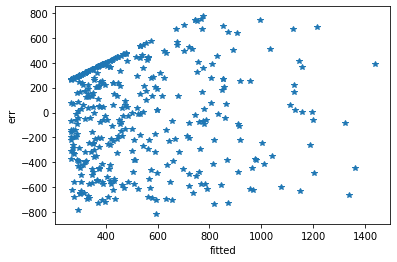

In [19]:
# err vs fitted
err = []
X   = []
for x in range(0,len(y_train)):
        err.append(y_pred[x]-y_train[x])
        X.append(y_pred[x])
        
plt.plot(X,err,'*')
plt.xlabel('fitted')
plt.ylabel('err')

In [20]:
# Change the path
dataset = pd.read_csv('Advertising.csv')

In [21]:
dataset

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [22]:
# Note that sklearn does not provide summary for the linear regression fit; we use another package here!
# Another Solution
import statsmodels.api as sm
X_train = dataset[['TV', 'radio']].values
y_train   = dataset['sales'].values.reshape(-1,1)
X = sm.add_constant(X_train)
model = sm.OLS(y_train,X).fit()
model.summary()  

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Thu, 18 Nov 2021   Prob (F-statistic):           4.83e-98
Time:                        10:53:46   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9211      0.294      9.919      0.000       2.340       3.502
x1             0.0458      0.001     32.909      0.000       0.043       0.048
x2             0.1880      0.008     23.382      0.000       0.172       0.204
==============================================================================
Omnibus:                       60.022   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              148.679
Skew:                          -1.323   Prob(JB):                     5.19e-33
Kurtosis:                       6.292   Cond. No.                         425.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0, 0.5, 'err')

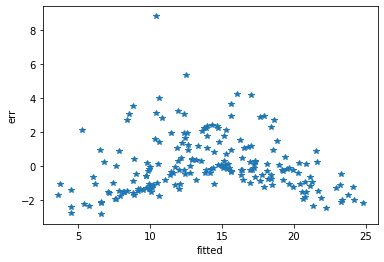

In [23]:
y_pred = model.predict(X)
# err vs fitted
err = []
X   = []
for x in range(0,len(y_train)):
        err.append(y_pred[x]-y_train[x])
        X.append(y_pred[x])
        
plt.plot(X,err,'*')
plt.xlabel('fitted')
plt.ylabel('err')

In [24]:
# With interaction term, TV x Radio
X_train = []
temp   = dataset['TV'].values.reshape(-1,1);
temp_e = dataset['radio'].values.reshape(-1,1);
for x in range(0,len(temp)):
    X_train.append([1,np.asscalar(temp[x]),np.asscalar(temp_e[x]), np.asscalar(temp[x])*np.asscalar(temp_e[x])] )

y_train   = dataset['sales'].values.reshape(-1,1)
model = sm.OLS(y_train,X_train).fit()
model.summary() 

C:\Users\WILLCA~1\AppData\Local\Temp/ipykernel_18200/2060096698.py:6: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  X_train.append([1,np.asscalar(temp[x]),np.asscalar(temp_e[x]), np.asscalar(temp[x])*np.asscalar(temp_e[x])] )


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     1963.
Date:                Thu, 18 Nov 2021   Prob (F-statistic):          6.68e-146
Time:                        10:53:47   Log-Likelihood:                -270.14
No. Observations:                 200   AIC:                             548.3
Df Residuals:                     196   BIC:                             561.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.7502      0.248     27.233      0.000       6.261       7.239
x1             0.0191      0.002     12.699      0.000       0.016       0.022
x2             0.0289      0.009      3.241      0.001       0.011       0.046
x3             0.0011   5.24e-05     20.727      0.000       0.001       0.001
==============================================================================
Omnibus:                      128.132   Durbin-Watson:                   2.224
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1183.719
Skew:                          -2.323   Prob(JB):                    9.09e-258
Kurtosis:                      13.975   Cond. No.                     1.80e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.8e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Text(0, 0.5, 'err')

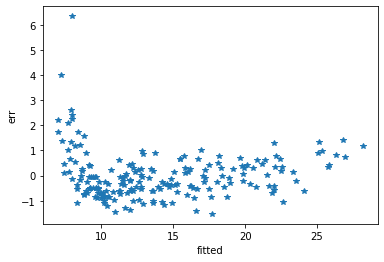

In [25]:
y_pred = model.predict(X_train)
# err vs fitted
err = []
X   = []
for x in range(0,len(y_train)):
        err.append(y_pred[x]-y_train[x])
        X.append(y_pred[x])
        
plt.plot(X,err,'*')
plt.xlabel('fitted')
plt.ylabel('err')

In [26]:
# Colinearity issue
X_train = []
temp   = dataset['TV'].values.reshape(-1,1);
temp_e = dataset['radio'].values.reshape(-1,1);
for x in range(0,len(temp)):
    X_train.append([1,np.asscalar(temp[x]),np.asscalar(temp[x]), np.asscalar(temp[x])*np.asscalar(temp_e[x])] )

y_train   = dataset['sales'].values.reshape(-1,1)
model = sm.OLS(y_train,X_train).fit()
model.summary() 

C:\Users\WILLCA~1\AppData\Local\Temp/ipykernel_18200/2760429618.py:6: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  X_train.append([1,np.asscalar(temp[x]),np.asscalar(temp[x]), np.asscalar(temp[x])*np.asscalar(temp_e[x])] )


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.966
Method:                 Least Squares   F-statistic:                     2804.
Date:                Thu, 18 Nov 2021   Prob (F-statistic):          1.86e-145
Time:                        10:53:47   Log-Likelihood:                -275.36
No. Observations:                 200   AIC:                             556.7
Df Residuals:                     197   BIC:                             566.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.4284      0.136     54.619      0.000       7.160       7.697
x1             0.0078      0.001     14.636      0.000       0.007       0.009
x2             0.0078      0.001     14.636      0.000       0.007       0.009
x3             0.0012   2.72e-05     45.344      0.000       0.001       0.001
==============================================================================
Omnibus:                      107.842   Durbin-Watson:                   2.199
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              681.859
Skew:                          -2.000   Prob(JB):                    8.63e-149
Kurtosis:                      11.113   Cond. No.                     8.15e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.07e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

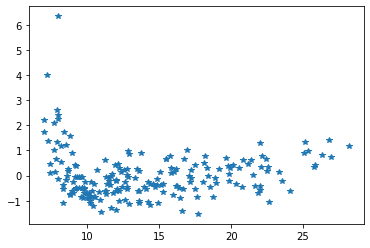

In [27]:
err = []
X   = []
for x in range(0,len(y_train)):
        err.append(y_pred[x]-y_train[x])
        X.append(y_pred[x])       
plt.plot(X,err,'*')

In [29]:
# Change the path
dataset = pd.read_csv('Auto.csv')

In [30]:
dataset

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
392,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
393,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
394,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
395,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [31]:
# mpg vs horsepower
X_train = []
y_train = []
temp   = dataset['horsepower'].values.reshape(-1,1);
temp_e = dataset['mpg'].values.reshape(-1,1);
for x in range(0,len(temp)):
    if np.asscalar(temp[x]) != '?':
        X_train.append([1,float(np.asscalar(temp[x]))] )
        y_train.append([float(np.asscalar(temp_e[x]))])

model = sm.OLS(y_train,X_train).fit()
model.summary() 

C:\Users\WILLCA~1\AppData\Local\Temp/ipykernel_18200/3128053285.py:7: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  if np.asscalar(temp[x]) != '?':
C:\Users\WILLCA~1\AppData\Local\Temp/ipykernel_18200/3128053285.py:8: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  X_train.append([1,float(np.asscalar(temp[x]))] )
C:\Users\WILLCA~1\AppData\Local\Temp/ipykernel_18200/3128053285.py:9: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  y_train.append([float(np.asscalar(temp_e[x]))])


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Thu, 18 Nov 2021   Prob (F-statistic):           7.03e-81
Time:                        10:54:29   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         39.9359      0.717     55.660      0.000      38.525      41.347
x1            -0.1578      0.006    -24.489      0.000      -0.171      -0.145
==============================================================================
Omnibus:                       16.432   Durbin-Watson:                   0.920
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.305
Skew:                           0.492   Prob(JB):                     0.000175
Kurtosis:                       3.299   Cond. No.                         322.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0, 0.5, 'fitted')

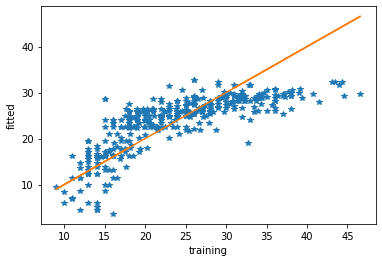

In [32]:
y_pred = model.predict(X_train)

plt.plot(y_train,y_pred,'*')
plt.plot(y_train,y_train)
plt.xlabel('training')
plt.ylabel('fitted')

Text(0, 0.5, 'err')

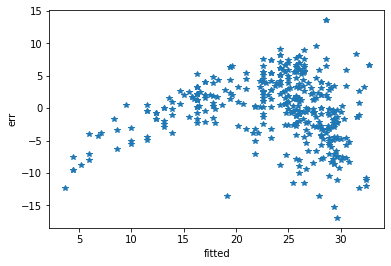

In [33]:
# err vs fitted
err = []
X   = []
for x in range(0,len(y_train)):
        err.append(y_pred[x]-y_train[x])
        X.append(y_pred[x])
        
plt.plot(X,err,'*')
plt.xlabel('fitted')
plt.ylabel('err')


In [34]:
# mpg vs horsepower and horsepower^2
X_train = []
y_train = []
temp   = dataset['horsepower'].values.reshape(-1,1);
temp_e = dataset['mpg'].values.reshape(-1,1);
for x in range(0,len(temp)):
    if np.asscalar(temp[x]) != '?':
        X_train.append([1,float(np.asscalar(temp[x])),float(np.asscalar(temp[x]))*float(np.asscalar(temp[x]))] )
        y_train.append([float(np.asscalar(temp_e[x]))])

model = sm.OLS(y_train,X_train).fit()
model.summary() 

C:\Users\WILLCA~1\AppData\Local\Temp/ipykernel_18200/2542088288.py:7: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  if np.asscalar(temp[x]) != '?':
C:\Users\WILLCA~1\AppData\Local\Temp/ipykernel_18200/2542088288.py:8: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  X_train.append([1,float(np.asscalar(temp[x])),float(np.asscalar(temp[x]))*float(np.asscalar(temp[x]))] )
C:\Users\WILLCA~1\AppData\Local\Temp/ipykernel_18200/2542088288.py:9: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  y_train.append([float(np.asscalar(temp_e[x]))])


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.688
Model:                            OLS   Adj. R-squared:                  0.686
Method:                 Least Squares   F-statistic:                     428.0
Date:                Thu, 18 Nov 2021   Prob (F-statistic):           5.40e-99
Time:                        10:54:29   Log-Likelihood:                -1133.2
No. Observations:                 392   AIC:                             2272.
Df Residuals:                     389   BIC:                             2284.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         56.9001      1.800     31.604      0.000      53.360      60.440
x1            -0.4662      0.031    -14.978      0.000      -0.527      -0.405
x2             0.0012      0.000     10.080      0.000       0.001       0.001
==============================================================================
Omnibus:                       16.158   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               30.662
Skew:                           0.218   Prob(JB):                     2.20e-07
Kurtosis:                       4.299   Cond. No.                     1.29e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.29e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Text(0, 0.5, 'fitted')

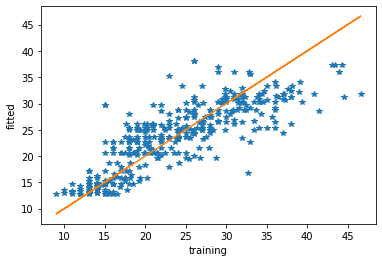

In [35]:
y_pred = model.predict(X_train)

plt.plot(y_train,y_pred,'*')
plt.plot(y_train,y_train)
plt.xlabel('training')
plt.ylabel('fitted')

Text(0, 0.5, 'err')

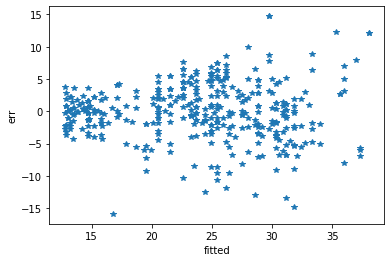

In [36]:
# err vs fitted
err = []
X   = []
for x in range(0,len(y_train)):
        err.append(y_pred[x]-y_train[x])
        X.append(y_pred[x])
        
plt.plot(X,err,'*')
plt.xlabel('fitted')
plt.ylabel('err')


In [37]:
# mpg vs horsepower and horsepower^2
X_train = []
y_train = []
temp   = dataset['horsepower'].values.reshape(-1,1);
temp_e = dataset['mpg'].values.reshape(-1,1);
for x in range(0,len(temp)):
    if np.asscalar(temp[x]) != '?':
        X_train.append([1,float(np.asscalar(temp[x])),float(np.asscalar(temp[x]))*float(np.asscalar(temp[x]))] )
        y_train.append([float(np.log(np.asscalar(temp_e[x])))])

model = sm.OLS(y_train,X_train).fit()
model.summary() 

C:\Users\WILLCA~1\AppData\Local\Temp/ipykernel_18200/3195503556.py:7: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  if np.asscalar(temp[x]) != '?':
C:\Users\WILLCA~1\AppData\Local\Temp/ipykernel_18200/3195503556.py:8: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  X_train.append([1,float(np.asscalar(temp[x])),float(np.asscalar(temp[x]))*float(np.asscalar(temp[x]))] )
C:\Users\WILLCA~1\AppData\Local\Temp/ipykernel_18200/3195503556.py:9: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  y_train.append([float(np.log(np.asscalar(temp_e[x])))])


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.732
Model:                            OLS   Adj. R-squared:                  0.731
Method:                 Least Squares   F-statistic:                     532.2
Date:                Thu, 18 Nov 2021   Prob (F-statistic):          4.54e-112
Time:                        10:54:29   Log-Likelihood:                 125.48
No. Observations:                 392   AIC:                            -245.0
Df Residuals:                     389   BIC:                            -233.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.4022      0.073     60.639      0.000       4.260       4.545
x1            -0.0171      0.001    -13.632      0.000      -0.020      -0.015
x2          3.901e-05   4.92e-06      7.925      0.000    2.93e-05    4.87e-05
==============================================================================
Omnibus:                        9.051   Durbin-Watson:                   1.092
Prob(Omnibus):                  0.011   Jarque-Bera (JB):               13.714
Skew:                          -0.142   Prob(JB):                      0.00105
Kurtosis:                       3.871   Cond. No.                     1.29e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.29e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Text(0, 0.5, 'fitted')

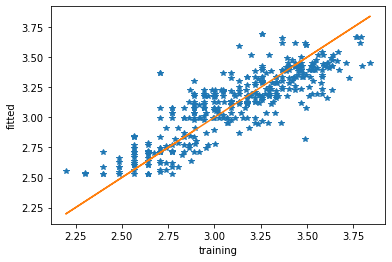

In [38]:
y_pred = model.predict(X_train)

plt.plot(y_train,y_pred,'*')
plt.plot(y_train,y_train)
plt.xlabel('training')
plt.ylabel('fitted')

Text(0, 0.5, 'err')

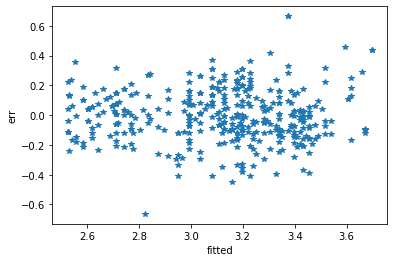

In [39]:
# err vs fitted
err = []
X   = []
for x in range(0,len(y_train)):
        err.append(y_pred[x]-y_train[x])
        X.append(y_pred[x])
        
plt.plot(X,err,'*')
plt.xlabel('fitted')
plt.ylabel('err')

In [40]:
err_std=np.std(err)
err_std

0.175689442026605

Text(0, 0.5, 'err')

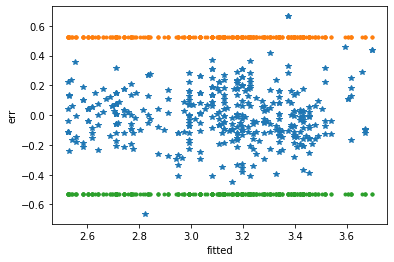

In [41]:
t   = [] 
t1  = []
for x in range(0,len(y_train)):
        t.append(3*err_std)
        t1.append(-3*err_std)
        
        
plt.plot(X,err,'*')
plt.plot(X,t,'.')
plt.plot(X,t1,'.')



plt.xlabel('fitted')
plt.ylabel('err')

In [42]:
# mpg vs horsepower and horsepower^2
X_train = []
y_train = []
temp   = dataset['mpg'].values.reshape(-1,1);
temp_e = dataset['horsepower'].values.reshape(-1,1);
for x in range(0,len(temp)):
    if np.asscalar(temp_e[x]) != '?':
        X_train.append([1,float(np.asscalar(temp[x]))] )
        y_train.append([float(np.asscalar(temp_e[x]))])

model = sm.OLS(y_train,X_train).fit()
model.summary() 

C:\Users\WILLCA~1\AppData\Local\Temp/ipykernel_18200/1697466034.py:7: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  if np.asscalar(temp_e[x]) != '?':
C:\Users\WILLCA~1\AppData\Local\Temp/ipykernel_18200/1697466034.py:8: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  X_train.append([1,float(np.asscalar(temp[x]))] )
C:\Users\WILLCA~1\AppData\Local\Temp/ipykernel_18200/1697466034.py:9: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  y_train.append([float(np.asscalar(temp_e[x]))])


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Thu, 18 Nov 2021   Prob (F-statistic):           7.03e-81
Time:                        10:54:30   Log-Likelihood:                -1804.2
No. Observations:                 392   AIC:                             3612.
Df Residuals:                     390   BIC:                             3620.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        194.4756      3.873     50.211      0.000     186.861     202.091
x1            -3.8389      0.157    -24.489      0.000      -4.147      -3.531
==============================================================================
Omnibus:                       45.875   Durbin-Watson:                   1.064
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               70.785
Skew:                           0.755   Prob(JB):                     4.26e-16
Kurtosis:                       4.434   Cond. No.                         78.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""